In [77]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

**Read Dataset**

In [78]:
df=pd.read_csv('Data/Student Depression Dataset (1).csv')
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [79]:
df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi',
       'City', '3.0', 'Less than 5 Kalyan', 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

**Drop Id**

In [80]:
df.drop(['id'],axis=1,inplace=True)

**Check if there is any missing values**

In [81]:
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

**Fill the missing value**

In [82]:
df['Financial Stress']=df['Financial Stress'].fillna(df['Financial Stress'].mode()[0])

**Check the datatypes**

In [83]:
df.dtypes

Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

**If datatype is object,convert it to numeric datatype using LabelEncoder**

In [84]:
import pickle
import re

In [85]:
encoder=LabelEncoder()
cols=['Gender','City','Profession','Sleep Duration','Dietary Habits','Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']
for col in cols:
  encoder.fit(df[col])
  filtered_text = re.sub(r'[^a-zA-Z0-9 ]', '', col)
  pickle.dump(encoder,open(f'artifacts/{filtered_text}.sav','wb'))
  print(encoder.classes_)
  df[col]=encoder.transform(df[col])


['Female' 'Male']
['3.0' 'Agra' 'Ahmedabad' 'Bangalore' 'Bhavna' 'Bhopal' 'Chennai' 'City'
 'Delhi' 'Faridabad' 'Gaurav' 'Ghaziabad' 'Harsh' 'Harsha' 'Hyderabad'
 'Indore' 'Jaipur' 'Kalyan' 'Kanpur' 'Khaziabad' 'Kibara' 'Kolkata'
 'Less Delhi' 'Less than 5 Kalyan' 'Lucknow' 'Ludhiana' 'M.Com' 'M.Tech'
 'ME' 'Meerut' 'Mihir' 'Mira' 'Mumbai' 'Nagpur' 'Nalini' 'Nalyan'
 'Nandini' 'Nashik' 'Patna' 'Pune' 'Rajkot' 'Rashi' 'Reyansh' 'Saanvi'
 'Srinagar' 'Surat' 'Thane' 'Vaanya' 'Vadodara' 'Varanasi' 'Vasai-Virar'
 'Visakhapatnam']
['Architect' 'Chef' 'Civil Engineer' 'Content Writer' 'Digital Marketer'
 'Doctor' 'Educational Consultant' 'Entrepreneur' 'Lawyer' 'Manager'
 'Pharmacist' 'Student' 'Teacher' 'UX/UI Designer']
['5-6 hours' '7-8 hours' 'Less than 5 hours' 'More than 8 hours' 'Others']
['Healthy' 'Moderate' 'Others' 'Unhealthy']
['B.Arch' 'B.Com' 'B.Ed' 'B.Pharm' 'B.Tech' 'BA' 'BBA' 'BCA' 'BE' 'BHM'
 'BSc' 'Class 12' 'LLB' 'LLM' 'M.Com' 'M.Ed' 'M.Pharm' 'M.Tech' 'MA' 'MBA'
 'MBBS' '

**Split features**

In [86]:
X=df.iloc[:,:-1]
X

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,33.0,51,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0
1,0,24.0,3,11,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1
2,1,31.0,44,11,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1
3,0,28.0,49,11,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1
4,0,25.0,16,11,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,45,11,5.0,0.0,5.75,5.0,0.0,0,3,11,1,7.0,1.0,1
27897,1,27.0,25,11,2.0,0.0,9.40,3.0,0.0,2,0,25,0,0.0,3.0,1
27898,1,31.0,9,11,3.0,0.0,6.61,4.0,0.0,0,3,22,0,12.0,2.0,0
27899,0,18.0,25,11,5.0,0.0,6.88,2.0,0.0,2,0,11,1,10.0,5.0,0


**Split Target**

In [87]:
y=df.iloc[:,-1]
y

0        1
1        0
2        0
3        1
4        0
        ..
27896    0
27897    0
27898    0
27899    1
27900    1
Name: Depression, Length: 27901, dtype: int64

**Data visualization**

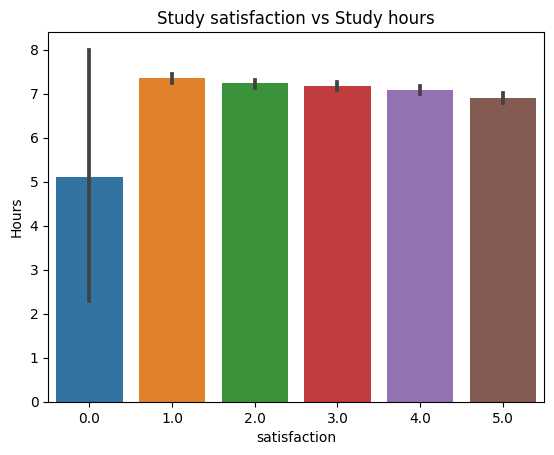

In [88]:
sns.barplot(x='Study Satisfaction',y='Work/Study Hours',data=df)
plt.title("Study satisfaction vs Study hours")
plt.xlabel("satisfaction")
plt.ylabel("Hours")
plt.show()

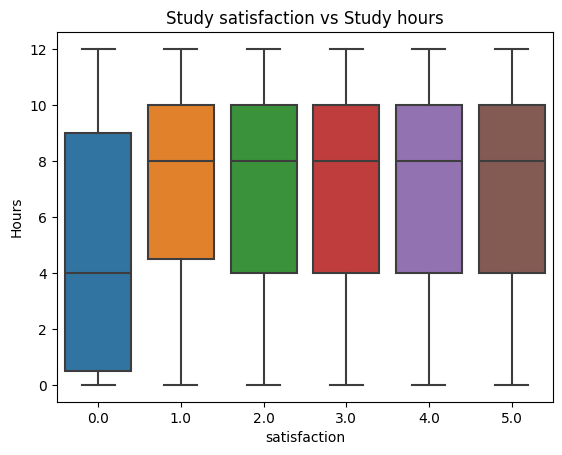

In [89]:
sns.boxplot(x='Study Satisfaction',y='Work/Study Hours',data=df)
plt.title("Study satisfaction vs Study hours")
plt.xlabel("satisfaction")
plt.ylabel("Hours")
plt.show()

**Scale using MinMaxScaler**

In [90]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[1.        , 0.36585366, 1.        , ..., 0.25      , 0.        ,
        0.        ],
       [0.        , 0.14634146, 0.05882353, ..., 0.25      , 0.25      ,
        1.        ],
       [1.        , 0.31707317, 0.8627451 , ..., 0.75      , 0.        ,
        1.        ],
       ...,
       [1.        , 0.31707317, 0.17647059, ..., 1.        , 0.25      ,
        0.        ],
       [0.        , 0.        , 0.49019608, ..., 0.83333333, 1.        ,
        0.        ],
       [1.        , 0.2195122 , 0.74509804, ..., 0.16666667, 0.5       ,
        1.        ]])

**Split X and y for testing and training**

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [92]:
X_train.shape,y_train.shape

((19530, 16), (19530,))

In [93]:
X_test.shape,y_test.shape

((8371, 16), (8371,))

**Model Creation and prediction using X_test**

******** KNeighborsClassifier(n_neighbors=9) *********
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      3443
           1       0.83      0.88      0.86      4928

    accuracy                           0.83      8371
   macro avg       0.82      0.81      0.82      8371
weighted avg       0.83      0.83      0.82      8371

******** SVC(kernel='poly') *********
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      3443
           1       0.85      0.90      0.88      4928

    accuracy                           0.85      8371
   macro avg       0.85      0.84      0.84      8371
weighted avg       0.85      0.85      0.85      8371

******** RandomForestClassifier() *********
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      3443
           1       0.86      0.88      0.87      4928

    accuracy                           0.84  

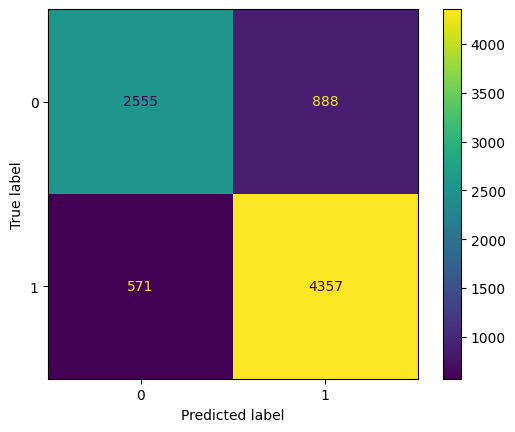

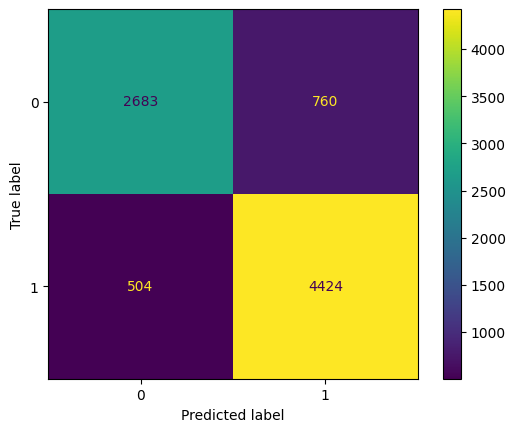

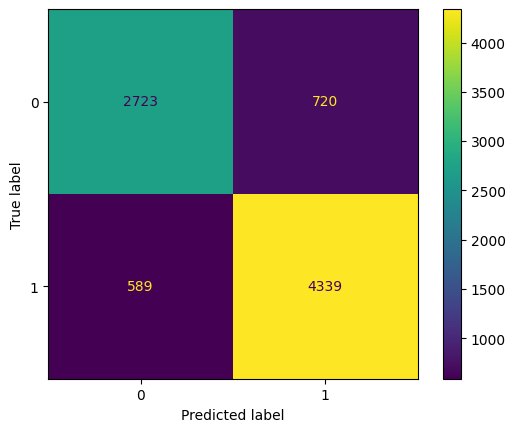

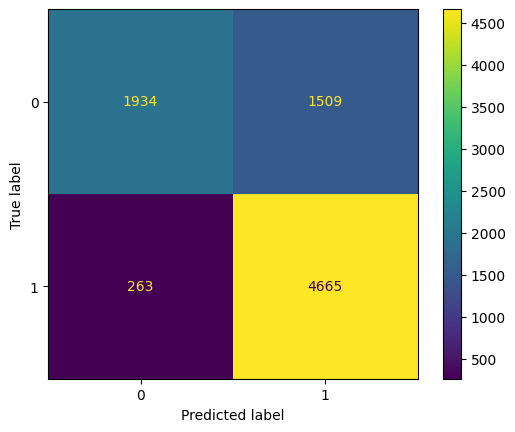

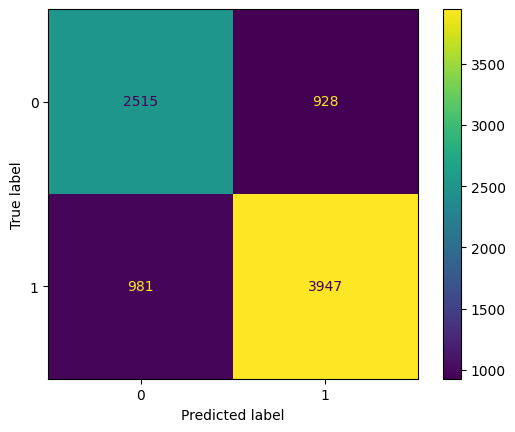

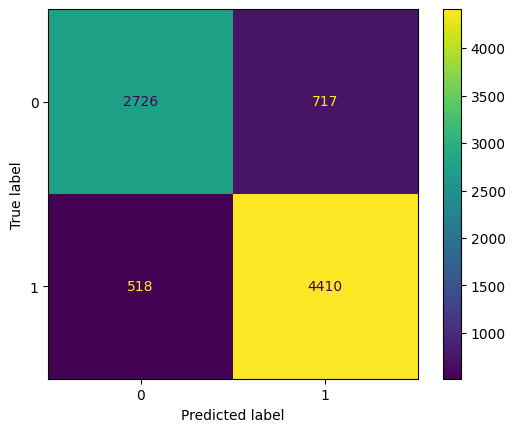

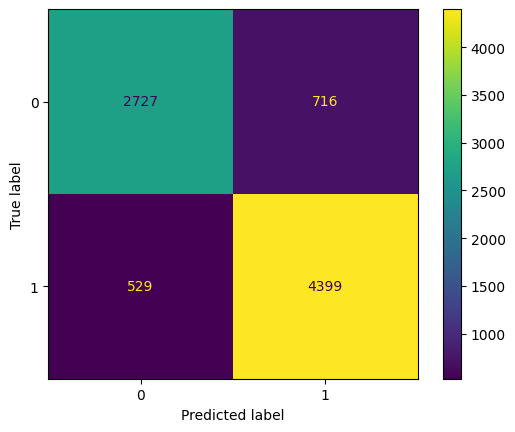

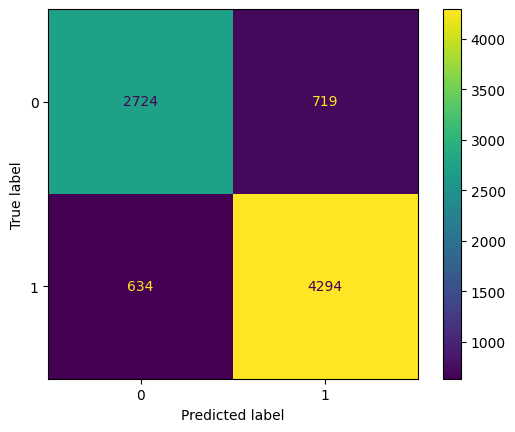

In [94]:
knn=KNeighborsClassifier(n_neighbors=9)
sv=SVC(kernel='poly')
nb=MultinomialNB()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
models=[knn,sv,rf,nb,dt,ab,gb,xgb]
for model in models:
  print("********",model,"*********")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**Oversampling**

In [95]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X_scaled,y)

In [96]:
y_os.value_counts()

Depression
1    16336
0    16336
Name: count, dtype: int64

In [97]:
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

In [98]:
X_os_train

array([[1.        , 0.14634146, 0.2745098 , ..., 0.66666667, 1.        ,
        1.        ],
       [1.        , 0.17402741, 0.94161805, ..., 0.74624656, 0.00563015,
        1.        ],
       [0.        , 0.2195122 , 0.74509804, ..., 0.75      , 0.25      ,
        0.        ],
       ...,
       [0.        , 0.3902439 , 0.29411765, ..., 0.83333333, 0.75      ,
        0.        ],
       [0.        , 0.26829268, 0.76470588, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.24091879, 0.88235294, ..., 0.63532129, 0.96865462,
        0.        ]])

In [99]:
knn_os=KNeighborsClassifier(n_neighbors=5)
sv_os=SVC(kernel='poly')
nb_os=MultinomialNB()
rf_os=RandomForestClassifier(random_state=1)
dt_os=DecisionTreeClassifier(random_state=1)
ab_os=AdaBoostClassifier()
gb_os=GradientBoostingClassifier()
xgb_os=XGBClassifier()
models=[knn_os,sv_os,rf_os,nb_os,dt_os,ab_os,gb_os,xgb_os]
for model in models:
  print("********",model,"*********")
  model.fit(X_os_train,y_os_train)
  y_pred_os=model.predict(X_os_test)
  print(classification_report(y_os_test,y_pred_os))


******** KNeighborsClassifier() *********
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4855
           1       0.84      0.82      0.83      4947

    accuracy                           0.83      9802
   macro avg       0.83      0.83      0.83      9802
weighted avg       0.83      0.83      0.83      9802

******** SVC(kernel='poly') *********
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4855
           1       0.84      0.86      0.85      4947

    accuracy                           0.85      9802
   macro avg       0.85      0.85      0.85      9802
weighted avg       0.85      0.85      0.85      9802

******** RandomForestClassifier(random_state=1) *********
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4855
           1       0.87      0.87      0.87      4947

    accuracy                           0.87 

**Hyperparameter Tuning**

#Gradient Boosting

In [100]:
params={'n_estimators':[100,200,300],'loss':['log_loss','exponential'],'learning_rate':[0.0,0.1,0.2]}

In [101]:
# clf=GridSearchCV(gb_os,params,cv=10,scoring='accuracy')
# clf.fit(X_train,y_train)

In [102]:
# clf.best_params_

In [103]:
# y_pred2=clf.predict(X_test)
# y_pred2

In [104]:
# print(classification_report(y_test,y_pred2))

In [105]:
X_os_train.shape

(22870, 16)

In [106]:
gb1=GradientBoostingClassifier()
gb1.fit(X_os_train,y_os_train)
y_pred_os=gb1.predict(X_os_test)
print(classification_report(y_os_test,y_pred_os))


              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4855
           1       0.86      0.88      0.87      4947

    accuracy                           0.87      9802
   macro avg       0.87      0.87      0.87      9802
weighted avg       0.87      0.87      0.87      9802



In [107]:
import pickle
pickle.dump(gb1,open('artifacts/gb1model.sav','wb'))

In [108]:
pickle.dump(scaler,open('artifacts/scaler.sav','wb'))